In [22]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd

In [ ]:
!pip install openpyxl

# 1. Hierarchical Clustering

## Importing the data

In [23]:
airline=pd.read_excel("C:\\Users\\jhishna2022\\Downloads\\EastWestAirlines.xlsx",sheet_name='data')
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [24]:
airline1 = airline.drop('ID#',axis=1)

In [25]:
def minmax_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [26]:
df_norm=minmax_func(airline1)

In [27]:
df_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.010837,0.0,0.00,0.0,0.0,0.032330,0.046512,0.006490,0.018868,0.168917,1.0
3995,0.037766,0.0,0.00,0.0,0.0,0.003720,0.058140,0.000000,0.000000,0.167953,1.0
3996,0.043169,0.0,0.50,0.0,0.0,0.096505,0.093023,0.000000,0.000000,0.168797,1.0
3997,0.032202,0.0,0.00,0.0,0.0,0.001896,0.011628,0.016225,0.018868,0.168676,0.0


## Creating dendogram

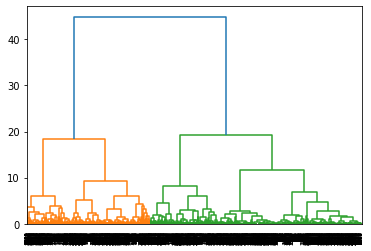

In [44]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='ward'))

## Creating Clusters

In [45]:
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')
hc

AgglomerativeClustering(n_clusters=5)

In [46]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
y_hc

array([1, 1, 1, ..., 0, 4, 4], dtype=int64)

In [47]:
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [48]:
Clusters

,Clusters
0,1
1,1
2,1
3,1
4,3
...,...
3994,0
3995,0
3996,0
3997,4


In [49]:
Clusters.value_counts()

Clusters
1           1011
0            946
2            808
4            699
3            535
dtype: int64

In [50]:
airline1['h_clusterid'] = y_hc
airline1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,4


In [51]:
airline1.groupby('h_clusterid').agg(['mean']).reset_index()

,h_clusterid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,79848.233615,285.097252,1.699789,1.024313,1.000000,12079.774841,12.133192,781.939746,2.369979,4372.173362,1.0
1,1,43313.653808,21.506429,1.000000,1.033630,1.000989,2562.614243,5.474777,169.510386,0.523244,4940.680514,0.0
2,2,106221.111386,161.262376,3.198020,1.001238,1.025990,26458.257426,16.363861,198.733911,0.558168,4367.250000,0.0
3,3,127475.028037,160.801869,4.362617,1.000000,1.050467,58656.919626,22.235514,991.110280,3.005607,5072.226168,1.0
4,4,30013.416309,98.054363,1.000000,1.000000,1.000000,2552.569385,6.101574,340.274678,0.948498,1568.864092,0.0


- From this we can name 5 groups. 
- Cluster 3: Premium Passengers, Most frequent flyer : In last 12 months,no. of flight transaction & flight miles is maximum.
- Cluster 0:  Very Frequent Flyer
- Cluster 2:  Frequent Flyer
- Cluster 1: Average Frequent Flyer
- Cluster 4: Below average frequent flyer

### Plot Clusters

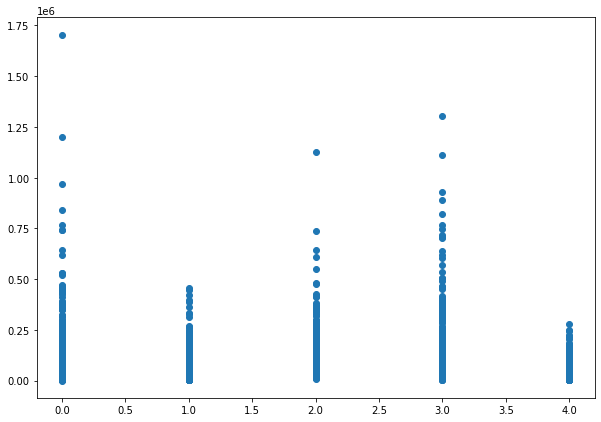

In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))  
plt.scatter(airline1['h_clusterid'],airline2['Balance']) 

# K- Means Clusters

In [59]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [60]:
air = pd.read_excel("C:\\Users\\jhishna2022\\Downloads\\EastWestAirlines.xlsx",sheet_name='data')
air

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


### EDA- Dropping a column

In [61]:
air1= air.drop('ID#',axis=1)

### Normalization

In [62]:
def norm_func(i):
    x = (i-i.mean())/(i.std())
    return (x)

In [63]:
x=norm_func(air.iloc[:,1:])
x

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-0.451084,-0.186275,-0.769482,-0.09823,-0.062759,-0.702698,-1.103926,-0.328562,-0.362123,1.395280,-0.766823
1,-0.539389,-0.186275,-0.769482,-0.09823,-0.062759,-0.701001,-0.999801,-0.328562,-0.362123,1.379784,-0.766823
2,-0.319991,-0.186275,-0.769482,-0.09823,-0.062759,-0.539185,-0.791550,-0.328562,-0.362123,1.411744,-0.766823
3,-0.583726,-0.186275,-0.769482,-0.09823,-0.062759,-0.689200,-1.103926,-0.328562,-0.362123,1.372037,-0.766823
4,0.239648,-0.186275,1.409295,-0.09823,-0.062759,1.082986,1.499207,1.154788,0.692404,1.363805,1.303755
...,...,...,...,...,...,...,...,...,...,...,...
3994,-0.547010,-0.186275,-0.769482,-0.09823,-0.062759,-0.356915,-0.791550,-0.185726,-0.098491,-1.314955,1.303755
3995,-0.091454,-0.186275,-0.769482,-0.09823,-0.062759,-0.669284,-0.687425,-0.328562,-0.362123,-1.318829,1.303755
3996,-0.000043,-0.186275,0.683036,-0.09823,-0.062759,0.343761,-0.375049,-0.328562,-0.362123,-1.315439,1.303755
3997,-0.185584,-0.186275,-0.769482,-0.09823,-0.062759,-0.689200,-1.103926,0.028527,-0.098491,-1.315924,-0.766823


### Creating Elbow chart --- to find best K value

[43977.99999999997, 35400.65686091339, 30891.520081260183, 27439.509147739976, 24535.192715433608, 21084.699817069446, 19161.068795125124, 17312.53614694197, 16039.39438778529, 14723.300656269479]


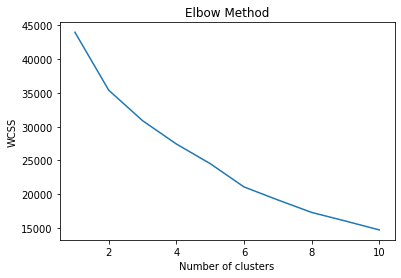

In [64]:
#WCSS (Within Cluster Sum of Squares)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

print(wcss)    
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Build Cluster algorithm

In [70]:
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=0)
clusters_new.fit(x)

KMeans(n_clusters=4, random_state=0)

In [71]:
clusters_new.labels_

array([1, 1, 1, ..., 0, 1, 1])

### Assign clusters to the data set

In [72]:
air1['clusterid_new'] = clusters_new.labels_

In [73]:
air1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clusterid_new
0,28143,0,1,1,1,174,1,0,0,7000,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,0
3997,54899,0,1,1,1,500,1,500,1,1401,0,1


In [66]:
clusters_new.cluster_centers_

array([[-0.29988217, -0.13207359, -0.60972832,  0.03377729, -0.06072139,
        -0.51601675, -0.4874995 , -0.18609397, -0.19853259, -0.20346235,
        -0.35089574],
       [ 1.15752771,  0.40666264,  0.11981451,  0.17820965, -0.06275873,
         0.65269158,  1.73154107,  3.73213336,  3.99407527,  0.26851628,
         0.89527364],
       [ 0.43286273, -0.10857791,  1.19061135, -0.08212954, -0.05464165,
         0.91104978,  0.74590719, -0.08179182, -0.08950832,  0.37462671,
         0.57199757],
       [ 0.45704649,  6.73025029, -0.04322321, -0.0982296 , -0.06275873,
         0.0637088 ,  0.06534987,  0.35964882,  0.39419749, -0.07121453,
         0.38726954],
       [ 0.63963927, -0.08442237,  1.0219566 , -0.0982296 , 15.64434291,
         3.17929372,  1.71439935,  0.03328853,  0.05968793,  0.23984262,
         0.33748514]])

In [74]:
air1.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,117730.104596,159.536450,3.725040,1.000000,1.038035,40359.335975,18.955626,353.344691,1.039620,4889.289223,0.652932
1,1,44423.237983,97.628842,1.239165,1.000000,1.000394,4733.110717,6.893617,200.667849,0.624507,3701.197006,0.202522
2,2,192618.243590,808.955128,2.185897,1.000000,1.000000,31951.666667,27.076923,5509.576923,16.032051,4714.961538,0.807692
3,3,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349


- Cluster 2 : Premium Passengers, Most frequent Flyer
- Cluster 0 : Frequent Flyer
- Cluster 3:  Average Frequent Flyer
- Cluster 1: Less frequent Flyer

## 3. DBSCAN Clustering

In [1]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
a = pd.read_excel("C:\\Users\\jhishna2022\\Downloads\\EastWestAirlines.xlsx",sheet_name='data')
a

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


### EDA

In [3]:
airline2=a.drop('ID#',axis=1)

In [4]:
airline2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


### Creating array from the data column

In [5]:
array_DBSCAN=airline2.values
array_DBSCAN

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]], dtype=int64)

### Normalization/ Standardization

In [6]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [7]:
X = scaler.fit_transform(array_DBSCAN)
X

array([[0.01650773, 0.        , 0.        , ..., 0.        , 0.84374246,
        0.        ],
       [0.01128788, 0.        , 0.        , ..., 0.        , 0.83988425,
        0.        ],
       [0.02425685, 0.        , 0.        , ..., 0.        , 0.84784181,
        0.        ],
       ...,
       [0.0431695 , 0.        , 0.5       , ..., 0.        , 0.16879672,
        1.        ],
       [0.03220189, 0.        , 0.        , ..., 0.01886792, 0.16867615,
        0.        ],
       [0.00176908, 0.        , 0.        , ..., 0.        , 0.16831444,
        0.        ]])

### DBSCAN for epsilon value of 0.5

In [8]:
dbscan = DBSCAN(eps=.5, min_samples=12,)
dbscan.fit(X)

DBSCAN(min_samples=12)

#### Creating clusters for epsilon value of 0.5

In [9]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [10]:
a1=airline2.copy()
a1['Cluster']=pd.DataFrame(dbscan.labels_)
#a1

In [11]:
a1['Cluster'].value_counts()

 0    2486
 1    1450
-1      47
 2      16
Name: Cluster, dtype: int64

### To find the percentage of noise points 

In [12]:
(len(a1[a1['Cluster']==-1])/len(a1))*100

1.1752938234558639

- In this case, 1.17 % data are noise points.

In [13]:
X1=metrics.silhouette_score(X,dbscan.labels_)
X1

0.33403723077785397

### DBSCAN for epsilon = 0.8

In [14]:
dbscan1 = DBSCAN(eps=.8, min_samples=12)
dbscan1.fit(X)

DBSCAN(eps=0.8, min_samples=12)

### Creating cluster for epsilon=0.8

In [15]:
#Noisy samples are given the label -1.
dbscan1.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [16]:
a2=airline2.copy()
a2['Cluster']=pd.DataFrame(dbscan1.labels_)
#a3

In [17]:
a2['Cluster'].value_counts()

0    2518
1    1481
Name: Cluster, dtype: int64

In [18]:
print((len(a2[a2['Cluster']==-1])/len(a2))*100)
sil_score=metrics.silhouette_score(X,dbscan1.labels_)
sil_score

0.0


0.535930510919477

- so, we need to take epsilon value between .5 and .8

### DBSCAN for epsilon=0.6

In [22]:
dbscan2 = DBSCAN(eps=.6, min_samples=12)
dbscan2.fit(X)

DBSCAN(eps=0.6, min_samples=12)

#### clusters for epsilon=0.6

In [35]:
#Noisy samples are given the label -1.
dbscan2.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [23]:
a3=airline2.copy()
a3['cluster5']=dbscan2.labels_

In [37]:
#airline2

In [24]:
a3['cluster5'].value_counts()

 0    2516
 1    1474
-1       9
Name: cluster5, dtype: int64

In [25]:
sil_score1=metrics.silhouette_score(X,dbscan2.labels_)

In [26]:
sil_score

0.535930510919477

### DBSCAN for epsilon=.55

In [27]:
dbscan3= DBSCAN(eps=.55,min_samples=12)
dbscan3.fit(X)

DBSCAN(eps=0.55, min_samples=12)

#### clusters for epsilon = .55

In [28]:
dbscan3.labels_

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [29]:
a4=airline2.copy()
a4['cluster6']=dbscan3.labels_

In [30]:
a4['cluster6'].value_counts()

 0    2516
 1    1471
-1      12
Name: cluster6, dtype: int64

In [31]:
sil_score2=metrics.silhouette_score(X,dbscan3.labels_)
sil_score2

0.5345695285758363

### DBSCAN for epsilon = .4

In [33]:
dbscan4 = DBSCAN(eps=0.4, min_samples=12)
dbscan4.fit(X)


y=pd.DataFrame(dbscan4.fit_predict(X),columns=['clusterid_DBSCAN'])
print(y['clusterid_DBSCAN'].value_counts())

# silhouette score
sil_score= metrics.silhouette_score(X, dbscan4.labels_)
print('silhouette score: ',sil_score)

 0    2485
 1    1441
-1      57
 2      16
Name: clusterid_DBSCAN, dtype: int64
silhouette score:  0.3302031758208956


- Epsilon = 0.6 is giving highest sil score so, we got 9 outliers and two groups.
- We can delete the outliers and can perform the K-means to find the no. of clusters, then we will get the best clusters

In [34]:
a3.groupby(['cluster5']).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster5,,,,,,,,,,,
-1,246878.666667,154.222222,2.222222,1.000000,3.111111,104303.333333,31.666667,6551.333333,14.000000,3800.888889,0.777778
0,59797.503180,87.672099,1.705882,1.013911,1.005962,10183.408585,9.141892,226.472178,0.653021,3821.937202,0.000000
1,96105.348033,240.395522,2.662144,1.015604,1.010176,28495.287653,15.678426,821.571913,2.526459,4626.809362,1.000000
